In [1]:
# Read and trigger the nuclick.py
import nuclickAIModel as aimodel
import json

# Opening JSON file
with open('sample.json', 'r') as openfile:

    # Reading from json file
    json_object = json.load(openfile)

In [2]:
aimodel.run_ai_model_inferencing(json_object)

/home/local/KHQ/s.erattakulangara/anaconda3/envs/runCustomAI/lib/python3.11/site-packages/torch/cuda/__init__.py:107: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:109.)
  return torch._C._cuda_getDeviceCount() > 0
/home/local/KHQ/s.erattakulangara/anaconda3/envs/runCustomAI/lib/python3.11/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


network output metatensor([0.0762, 0.2985, 0.6154, 0.0100])
network output metatensor([3.8454e-07, 2.5464e-08, 9.9999e-01, 5.2718e-06])
network output metatensor([3.5885e-04, 3.0815e-04, 9.9910e-01, 2.2839e-04])
network output metatensor([1.2953e-05, 4.8888e-07, 9.9998e-01, 6.4230e-06])
[2, 2, 2, 2]


[2, 2, 2, 2]

In [5]:
#check what's inside the image
import numpy as np
import matplotlib.pyplot as plt
data = np.load('processed.npy')

In [6]:
data.shape

(4, 128, 128)

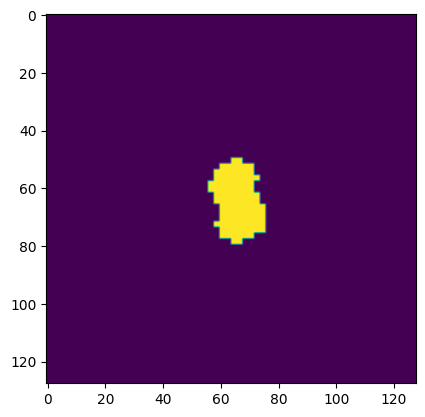

In [7]:
plt.imshow((data[3,:,:]))

In [45]:
from monai.transforms import LoadImaged, EnsureChannelFirstd, Compose, ScaleIntensityRangeD
from monai.data import PILReader
from monai.apps.nuclick.transforms import AddLabelAsGuidanced
import matplotlib.pyplot as plt
import numpy as np
from monai.transforms import Transform


class BinarizeImage(Transform):
    def __init__(self, threshold=128, keys="image",):
        super().__init__()
        self.threshold = threshold
        self.keys = keys

    def __call__(self, data):
        data[self.keys] = (data[self.keys] >= self.threshold).astype(np.float32)
        return data


transforms = Compose([
    LoadImaged(keys="image", dtype=np.uint8, reader=PILReader(converter=lambda im: im.convert("RGB"))),
    LoadImaged(keys="label", dtype=np.uint8, reader=PILReader(converter=lambda im: im.convert("L"))),
    EnsureChannelFirstd(keys=("image", "label")),
    ScaleIntensityRangeD(keys="image", a_min=0.0, a_max=255.0, b_min=-1.0, b_max=1.0),
    BinarizeImage(keys=("label"), threshold=128),
    AddLabelAsGuidanced(keys="image", source="label"),])

input_data = {"image": 'image.png', "label": 'mask.png'}
output_data = transforms(input_data)

/home/local/KHQ/s.erattakulangara/anaconda3/envs/runCustomAI/lib/python3.11/site-packages/monai/utils/deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


In [46]:
output_data['label'].shape

(1, 128, 128)

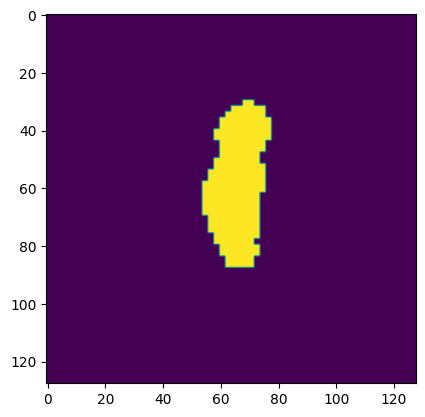

In [47]:
plt.imshow(np.squeeze(output_data['label']))

In [49]:
np.unique(output_data['label'])

array([0., 1.], dtype=float32)